In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['OMP_NUM_THREADS'] = '1'  # noqa, must go before jax


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join

In [4]:
from cmass.bias.rho_to_halo import sample_counts

In [5]:
lhid = 3
wdir = '/home/mattho/git/ltu-cmass/data/'
cdir = wdir+f'test/borgpm/L3000-N384/{lhid}'
os.listdir(cdir)

['rho.npy', 'fvel.npy', 'snapshots.npz', 'config.yaml']

In [6]:
snaps = np.load(join(cdir, 'snapshots.npz'), allow_pickle=True, encoding='bytes')

In [7]:
rhos = snaps['rhos'].item()
fvels = snaps['fvels'].item()

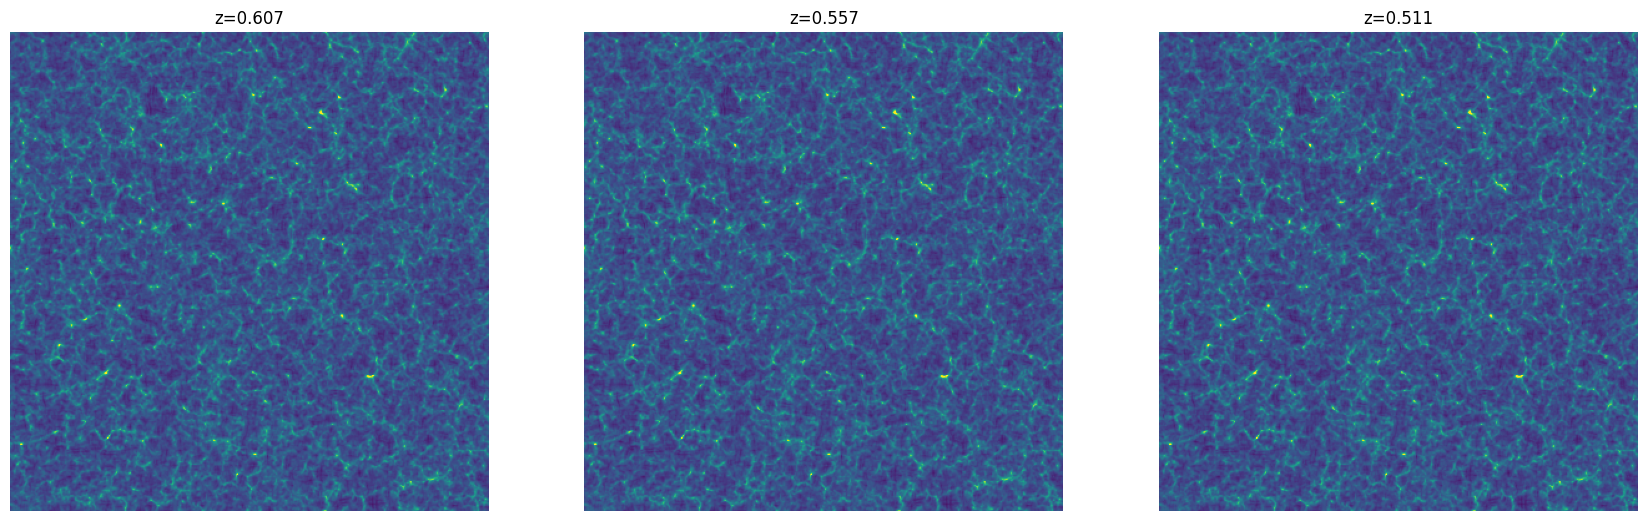

In [8]:
Nsnap = len(fvels)
f, axs = plt.subplots(1, Nsnap, figsize=(7*Nsnap, 10))
for i, (key, rho) in enumerate(rhos.items()):
    ax = axs[i]
    # x_ = np.linalg.norm(rho[50], axis=-1)
    x_ = np.mean(rho[50:60], axis=0)
    ax.imshow(x_, vmin=0,vmax=0.05)
    ax.set_title(f"z={1/key-1:.3f}")
    ax.axis('off')

In [7]:
rhos = snaps['rhos'].item()
fvels = snaps['fvels'].item()

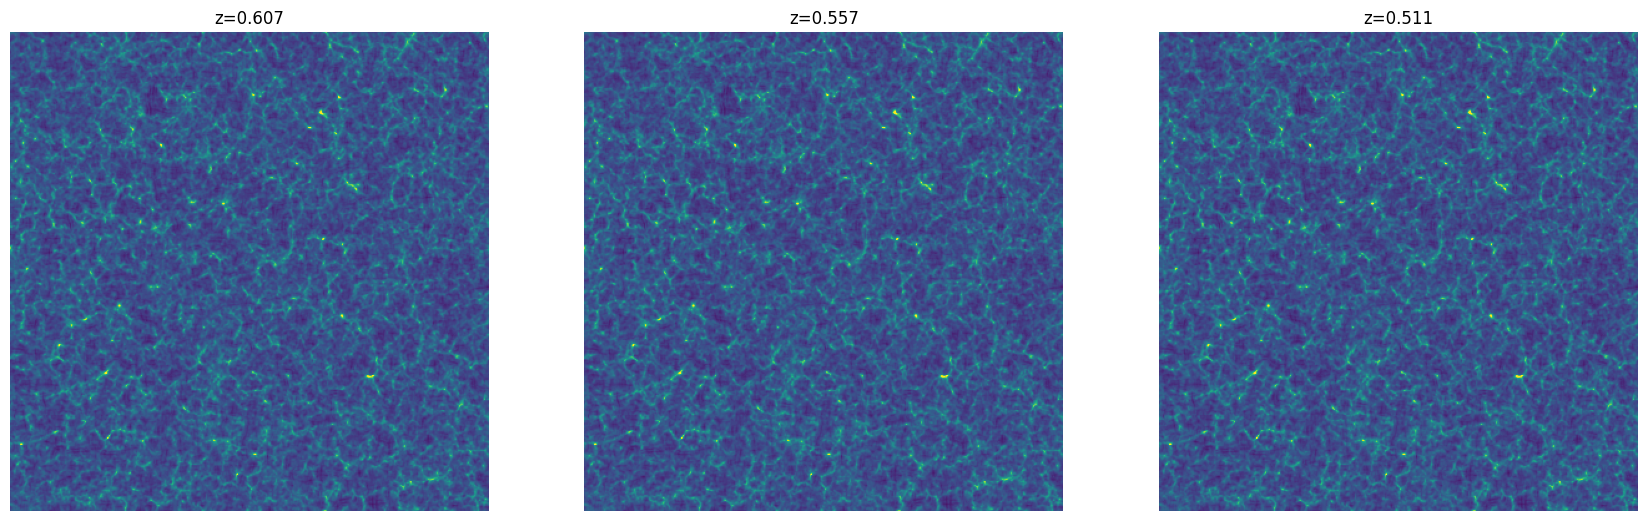

In [8]:
Nsnap = len(fvels)
f, axs = plt.subplots(1, Nsnap, figsize=(7*Nsnap, 10))
for i, (key, rho) in enumerate(rhos.items()):
    ax = axs[i]
    # x_ = np.linalg.norm(rho[50], axis=-1)
    x_ = np.mean(rho[50:60], axis=0)
    ax.imshow(x_, vmin=0,vmax=0.05)
    ax.set_title(f"z={1/key-1:.3f}")
    ax.axis('off')

In [9]:
x_.max()

0.0768924

In [ ]:
from cmass.bias.rho_to_halo import (
    sample_positions, load_bias_params, sample_velocities_CIC
)

popt, medges = load_bias_params(bias_path)
# logging.info('Sampling power law...')
hcount = sample_counts(rho, popt)

# logging.info('Sampling halo positions as a Poisson field...')
hpos = sample_positions(hcount, cfg)
hvel = sample_velocities_CIC(hpos, cfg, fvel)

def combine(x):
    x = [t for t in x if len(t) > 0]
    return np.concatenate(x, axis=0)
hpos, hvel = map(combine, [hpos, hvel])

In [9]:

cdir = wdir+f'inf_3gpch/borgpm/L3000-N384/{lhid}'
hpos = np.load(join(cdir, 'halo_pos.npy'))
hvel = np.load(join(cdir, 'halo_vel.npy'))

In [10]:
gpos = hpos + np.random.normal(0, 1, hpos.shape)

In [11]:
import cmass.lightcone.lc as lc

In [12]:
zlist = [0.45, 0.5, 0.55, 0.6]
alist = 1/(1+np.array(zlist))

In [13]:

boss_dir = '/home/mattho/git/ltu-cmass/data/obs'
# zlist =  list(fvels.keys())

m = lc.Mask(boss_dir=boss_dir)


In [14]:
l = lc.Lightcone(
    boss_dir=boss_dir,
    mask=m,
    Omega_m=0.3, zmin=0.40, zmax=0.65,
    snap_times=alist,
    verbose=True
)

process_times
interpolate_chi_z
read_boss_nz


In [15]:

for snap_idx, a in enumerate(alist):
    gpos = hpos + np.random.normal(0, 1, hpos.shape)
    gvel = hvel + np.random.normal(0, 1, hvel.shape)
    l.add_snap(snap_idx, gpos, gvel, hvel)

	remap_snapshot
	choose_galaxies
Done with snap index 0
	remap_snapshot
	choose_galaxies
Done with snap index 1
	remap_snapshot
	choose_galaxies
Done with snap index 2
	remap_snapshot
	choose_galaxies
Done with snap index 3


In [16]:
ra, dec, z, galid = l.finalize()

downsample
keep_fraction:
0.37 0.42 0.55 0.64 0.66 0.62 0.51 0.39 0.31 0.23 
fibcoll
downsample
keep_fraction:
0.93 0.93 0.93 0.93 0.93 0.93 0.94 0.93 0.93 0.93 


In [17]:
def split_galid (gid) :
    return np.divmod(gid, 2**((gid.itemsize-1)*8))
galsnap, galidx = split_galid(galid)

print(f'{galsnap.min()} <= galsnap <= {galsnap.max()}')
print(f'{galidx.min()} <= galidx <= {galidx.max()}')

0 <= galsnap <= 3
34 <= galidx <= 14979863


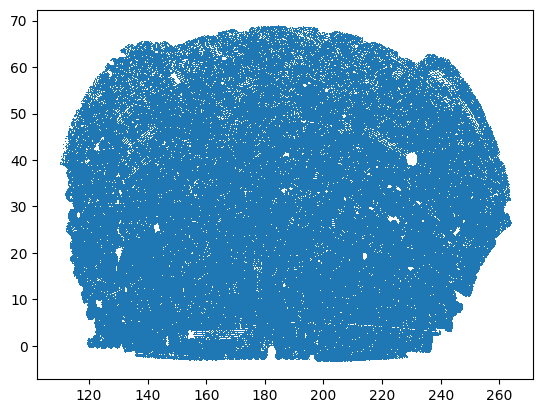

In [18]:
plt.plot(ra, dec, ',', ms=1)
# plt.xlim(220, 260)
# plt.ylim(-20,30)

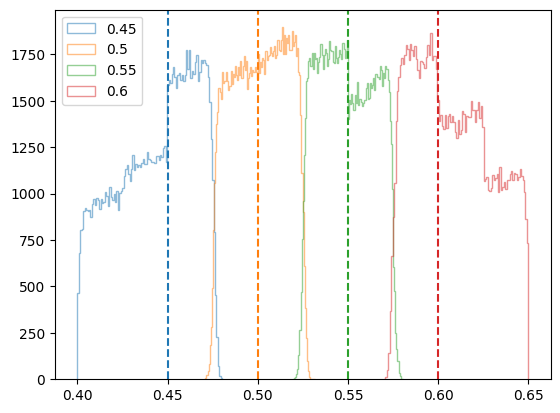

In [20]:
f, ax = plt.subplots()
for i in np.unique(galsnap):
    mask = (galsnap == i)
    ax.hist(z[mask], bins=100, histtype='step', color=f"C{i}", 
            label=f'{zlist[i]}', alpha=0.5)
    ax.axvline(zlist[i], c=f"C{i}", ls='--')
ax.legend()
    

In [32]:
from cmass.survey.tools import sky_to_xyz
from astropy.cosmology import Planck15

rdz = np.stack([ra, dec, z], axis=-1)
xyz = sky_to_xyz(rdz, Planck15)

In [33]:
galsnapz = np.array(zlist)[galsnap]

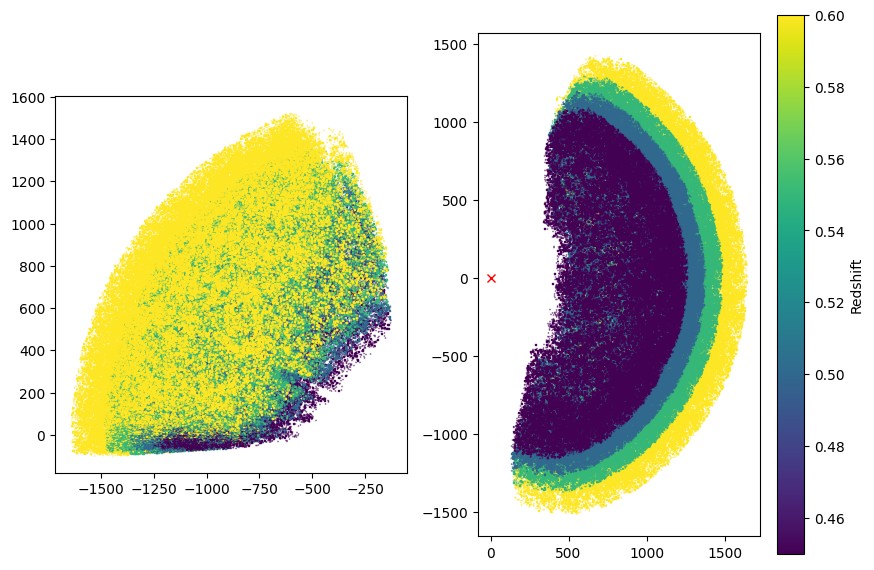

In [34]:
f, axs = plt.subplots(1, 2, figsize=(10, 7))
im = axs[0].scatter(xyz[:,0], xyz[:,2], c=galsnapz, marker=',', s=0.05)
axs[0].set_aspect('equal')
im = axs[1].scatter(-xyz[:,0], xyz[:,1], c=galsnapz, marker=',', s=0.05)
axs[1].set_aspect('equal')
axs[1].plot(0,0, 'rx')
plt.colorbar(im, label='Redshift')

In [29]:
odir = '/home/mattho/git/ltu-cmass/data/cmass_ngc/cmass/L0-N0/0/obs'
os.listdir(odir)
rdz = np.load(odir+'/rdz0.npy')

In [30]:
zmin, zmax = 0.4, 0.65
H, _ = np.histogram(rdz[:,-1], bins=10, range=(zmin, zmax))
print('\n'.join(H.astype(str)))

28724
36318
52032
67135
73433
71509
64379
53856
43913
33001


In [ ]:
# import lc

# how many galaxies we randomly generate per volume
N = 3000000

# where mask .ply files and redshift histogram are stored
# boss_dir = '../data/obs'

# scale factors, need to be monotonically decreasing
snap_times = [0.7, 0.65, 0.6, ]

# make the mask (this is a bit expensive, so we do it outside the lightcone so it can be re-used)
print('Starting mask loading...')
m = lc.Mask(boss_dir=boss_dir)
print('...finished mask loading')

# run the constructor
l = lc.Lightcone(
    boss_dir=boss_dir, mask=m,
    Omega_m=0.3, zmin=0.40, zmax=0.65,
    snap_times=snap_times,
    verbose=True
)

# # add some snapshots
# rng = np.random.default_rng()
# for snap_idx, a in enumerate(snap_times):
#     xgal = rng.random((N, 3)) * 3e3
#     vgal = (rng.random((N, 3))-0.5)*300
#     vhlo = (rng.random((N, 3))-0.5)*300
#     l.add_snap(snap_idx, xgal, vgal, vhlo)

# ra, dec, z = l.finalize()



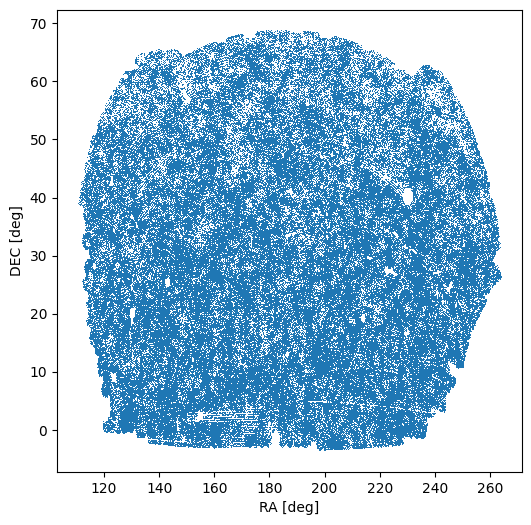

In [39]:
# check if mask is working correctly
fig, ax = plt.subplots(figsize=(6, 6))
choose = (z > 0.5) * (z < 0.6)
ax.plot(ra[choose], dec[choose], linestyle='none', marker=',')
ax.set_xlabel('RA [deg]')
ax.set_ylabel('DEC [deg]')
plt.show()

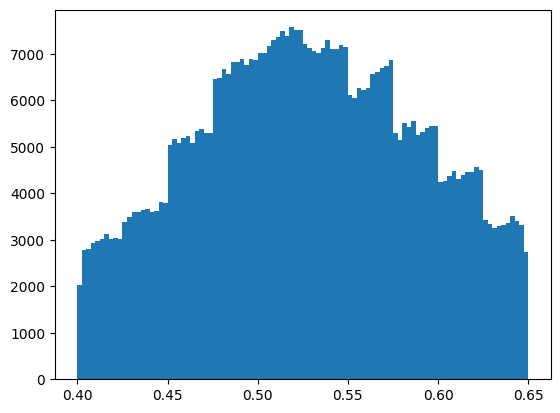

In [40]:
plt.hist(z, bins=100);

In [41]:
from cmass.survey.tools import sky_to_xyz
from astropy.cosmology import Planck15

rdz = np.stack([ra, dec, z], axis=-1)
xyz = sky_to_xyz(rdz, Planck15)

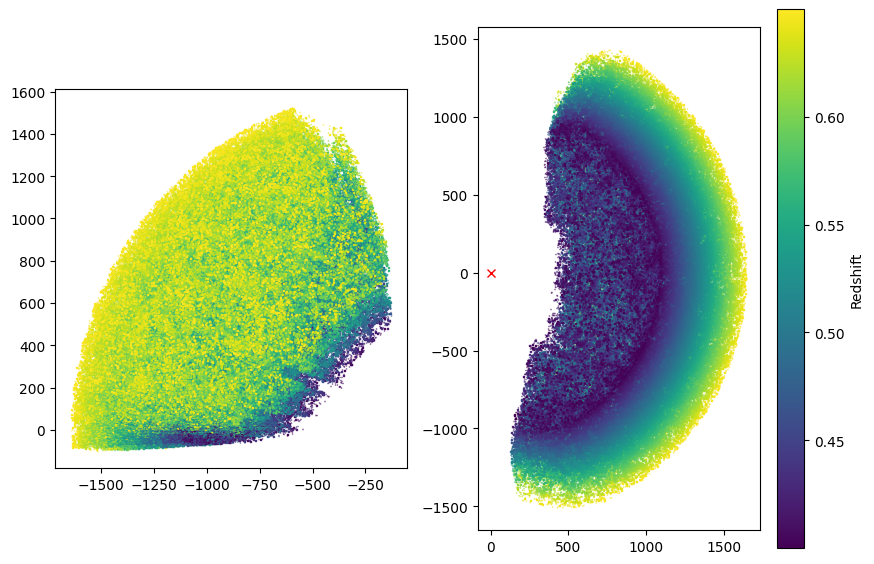

In [48]:
f, axs = plt.subplots(1, 2, figsize=(10, 7))
im = axs[0].scatter(xyz[:,0], xyz[:,2], c=rdz[:,2], marker=',', s=0.1)
axs[0].set_aspect('equal')
im = axs[1].scatter(-xyz[:,0], xyz[:,1], c=rdz[:,2], marker=',', s=0.05)
axs[1].set_aspect('equal')
axs[1].plot(0,0, 'rx')
plt.colorbar(im, label='Redshift')